In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
import itertools as it

In [2]:
def compare_warnings(DataFrame):
    if not DataFrame:
        return []
    else:
        indicator0 = 0
        indicator1 = 0 
        for x in DataFrame:
            if x[1] != 0:
                indicator1 += 1
            else:
                indicator0 += 1
        if indicator0 < indicator1:
            return [DataFrame[0][0], 1]
        else:
            return [DataFrame[0][0], 0]

In [3]:
def categorize(dataframe, row):
    data = []
    data0 = []
    data1 = []
    data2 = []
    data3 = []
    data4 = []
    data5 = []
    data6 = []
    data7 = []
    data8 = []
    data9 = []
    iterrator = 0
    for key, value in dataframe.iterrows():
        if 0 <= value[row] < 0.1:
            data0.append([0, value['warning']])
            dataframe[row].array[iterrator] = 0
        elif 0.1 <= value[row] < 0.2:
            data1.append([1, value['warning']])
            dataframe[row].array[iterrator] = 1
        elif 0.2 <= value[row] < 0.3:
            data2.append([2., value['warning']])
            dataframe[row].array[iterrator] = 2
        elif 0.3 <= value[row] < 0.4:
            data3.append([3, value['warning']])
            dataframe[row].array[iterrator] = 3
        elif 0.4 <= value[row] < 0.5:
            data4.append([4, value['warning']])
            dataframe[row].array[iterrator] = 4
        elif 0.5 <= value[row] < 0.6:
            data5.append([5, value['warning']])
            dataframe[row].array[iterrator] = 5
        elif 0.6 <= value[row] < 0.7:
            data6.append([6, value['warning']])
            dataframe[row].array[iterrator] = 6
        elif 0.7 <= value[row] < 0.8:
            data7.append([7, value['warning']])
            dataframe[row].array[iterrator] = 7
        elif 0.8 <= value[row] < 0.9:
            data8.append([8, value['warning']])
            dataframe[row].array[iterrator] = 8
        elif 0.9 <= value[row] <= 1:
            data9.append([9, value['warning']])
            dataframe[row].array[iterrator] = 9
        iterrator += 1
    data.append(compare_warnings(data0))
    data.append(compare_warnings(data1))
    data.append(compare_warnings(data2))
    data.append(compare_warnings(data3))
    data.append(compare_warnings(data4))
    data.append(compare_warnings(data5))
    data.append(compare_warnings(data6))
    data.append(compare_warnings(data7))
    data.append(compare_warnings(data8))
    data.append(compare_warnings(data9))
    return data
    

In [4]:
train = pd.read_csv('training_data.csv',sep="\t")
train = train.drop(columns="Unnamed: 0")
test = pd.read_csv('testing_data.csv',sep="\t")
test = test.drop(columns="Unnamed: 0")
copy_train = train.copy()
copy_test = test.copy()

In [5]:
test_X = test.drop(columns="warning")
test_Y = test[["warning"]].copy()

In [6]:
train_X = train.drop(columns="warning")
train_Y = train[["warning"]].copy()

In [7]:
ch4=categorize(copy_train, 'CH4')
nox=categorize(copy_train, 'NOx')
pahs=categorize(copy_train,'PAHs')
pm25=categorize(copy_train, 'PM2.5')
o3=categorize(copy_train, 'O3')
copy_train.head()

,warning,PAHs,O3,NOx,CH4,PM2.5
0,0,4.0,6.0,6.0,2.0,4.0
1,0,2.0,5.0,6.0,6.0,5.0
2,0,7.0,6.0,9.0,4.0,5.0
3,1,7.0,6.0,6.0,2.0,3.0
4,1,4.0,9.0,4.0,6.0,5.0


In [8]:
def One_rule(dataframe, data, row):
    all = 1
    sum=0
    good_predict = 0
    y_true = []
    y_pred = []
    for key, value in dataframe.iterrows():
        for x in data:
            if x[0] == value[row]:
                all += 1
                y_true.append(value['warning'])
                y_pred.append(x[1])
                if x[1] == value['warning']:
                    good_predict += 1      
    accuracy_value = round(good_predict/all,3)
    precision_value= round(precision_score(y_true, y_pred, average='binary'),3)
    recall_value = round(recall_score(y_true, y_pred, average='binary'),3)
    print("Náš 1R klasifikátor na parametri",row, "dosahuje tieto hodnoty:")
    print()
    print("\t Accuracy: " + str(accuracy_value))
    print("\t Precision: " +str(precision_value))
    print("\t Recall: " +str(recall_value))

In [9]:
One_rule(copy_train, ch4, 'CH4')

Náš 1R klasifikátor na parametri CH4 dosahuje tieto hodnoty:

	 Accuracy: 0.642
	 Precision: 0.719
	 Recall: 0.655


In [10]:
One_rule(copy_train, nox, 'NOx')

Náš 1R klasifikátor na parametri NOx dosahuje tieto hodnoty:

	 Accuracy: 0.642
	 Precision: 0.777
	 Recall: 0.561


In [11]:
One_rule(copy_train, pahs, 'PAHs')

Náš 1R klasifikátor na parametri PAHs dosahuje tieto hodnoty:

	 Accuracy: 0.597
	 Precision: 0.597
	 Recall: 1.0


In [12]:
One_rule(copy_train, pm25, 'PM2.5')

Náš 1R klasifikátor na parametri PM2.5 dosahuje tieto hodnoty:

	 Accuracy: 0.597
	 Precision: 0.597
	 Recall: 1.0


In [13]:
One_rule(copy_train, o3, 'O3')

Náš 1R klasifikátor na parametri O3 dosahuje tieto hodnoty:

	 Accuracy: 0.623
	 Precision: 0.638
	 Recall: 0.851


### Decision tree

<function matplotlib.pyplot.show(close=None, block=None)>

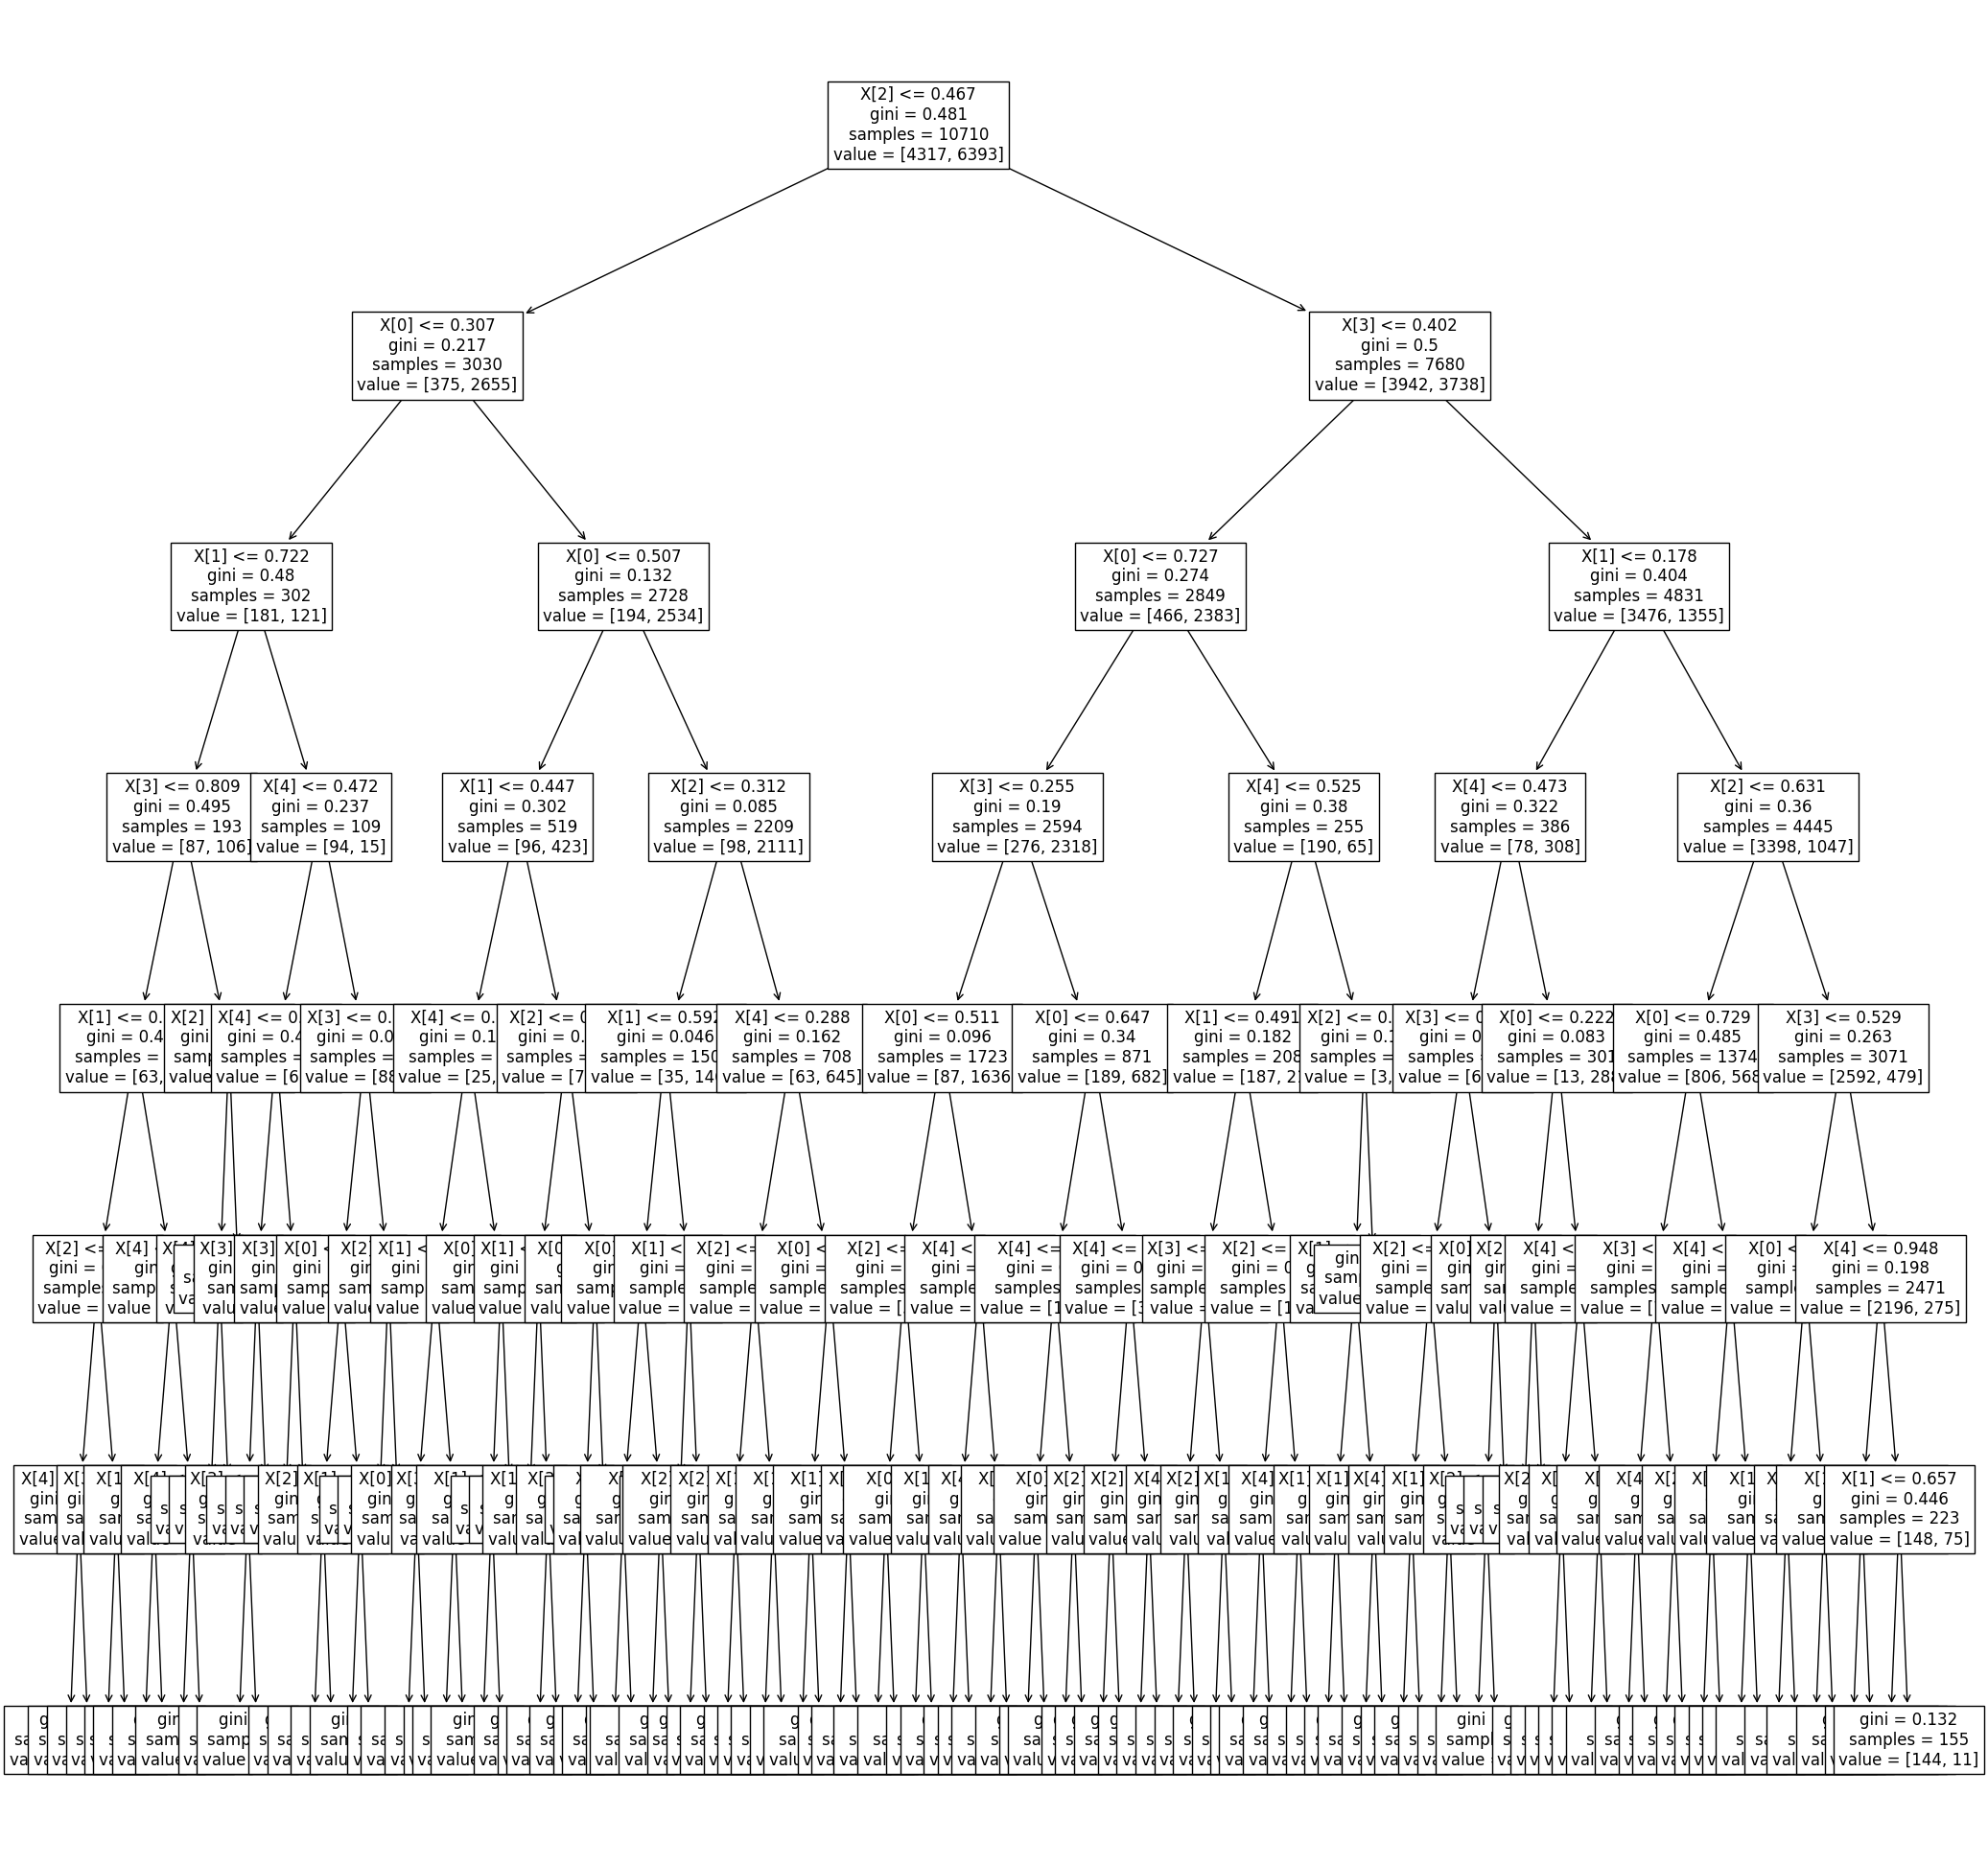

In [14]:
clf= tree.DecisionTreeClassifier(max_depth=7)
clf = clf.fit(train_X, train_Y)
plt.figure(figsize=(25,25))
tree.plot_tree(clf,fontsize=12)
plt.show

In [15]:
predict=clf.predict(test_X)
print(classification_report(test_Y, predict,digits = 4))

              precision    recall  f1-score   support

           0     0.8583    0.8323    0.8451       495
           1     0.8833    0.9023    0.8927       696

    accuracy                         0.8732      1191
   macro avg     0.8708    0.8673    0.8689      1191
weighted avg     0.8729    0.8732    0.8729      1191



### Random forest

In [16]:
clf = RandomForestClassifier(max_depth=5, random_state=1)
clf.fit(train_X, train_Y['warning'])

RandomForestClassifier(max_depth=5, random_state=1)

In [17]:
predict=clf.predict(test_X)
print(classification_report(test_Y, predict,digits = 4))

              precision    recall  f1-score   support

           0     0.8463    0.8566    0.8514       495
           1     0.8971    0.8894    0.8932       696

    accuracy                         0.8757      1191
   macro avg     0.8717    0.8730    0.8723      1191
weighted avg     0.8760    0.8757    0.8758      1191



In [18]:
hyperparameters={
   'max_depth' : [10, 15, 20, 25],
   'min_samples_split' : [2, 3, 4, 5],
   'min_samples_leaf' :[1,2,3,5,8,13,21,34,55],
   'max_features' :[1,2,3,4],
    'criterion' : ['gini', 'entropy'],
   'splitter' : ['best', 'random']
}

In [19]:
dtree = tree.DecisionTreeClassifier()
grid = GridSearchCV(dtree, hyperparameters, cv=5, verbose=1, n_jobs=-1)
top_res = grid.fit(train_X, train_Y)

Fitting 5 folds for each of 2304 candidates, totalling 11520 fits


In [20]:
print(top_res)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20, 25],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 3, 5, 8, 13, 21, 34, 55],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=1)


In [21]:
predict = top_res.predict(test_X)
acc=(accuracy_score(test_Y, predict))
prec=(precision_score(test_Y, predict))
rec=(recall_score(test_Y, predict))
print("Accuracy: " + str(acc))
print("Precision: " +str(prec))
print("Recall: " +str(rec))

Accuracy: 0.8782535684298909
Precision: 0.9045521292217328
Recall: 0.8850574712643678


In [22]:
print("Najlepšie dosiahnuté skóre bolo nasledovné:", grid.best_score_)
grid.best_params_

Najlepšie dosiahnuté skóre bolo nasledovné: 0.888702147525677


{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'splitter': 'random'}

In [23]:
best = grid.best_estimator_
best
#plot = plt.figure(figsize=(50,50))
#_ = tree.plot_tree(best, feature_names=train_X.columns, class_names=['0', '1'])
#plt.savefig('Hyper.png')
#plt.show

DecisionTreeClassifier(max_depth=15, max_features=4, min_samples_leaf=3,
                       min_samples_split=4, splitter='random')

In [24]:
def transform_col(dataframe, column):
        quartil_down = dataframe[column].quantile(0.05)
        quartil_up = dataframe[column].quantile(0.95)
        
        for i, value in dataframe.iterrows():
            if value[column] < quartil_down:
                dataframe.loc[i, column] = quartil_down
            elif value[column] > quartil_up:
                dataframe.loc[i, column] = quartil_up
        return dataframe
def transform(dataframe):
    col_names= list(dataframe.columns.values)
    for column_name in col_names:
        transform_col(dataframe,column_name)
    return dataframe

In [25]:
def identify_good_cols(training_data):
    good_cols = ['warning']
    test_out = training_data["warning"]
    test_input = training_data.copy()
    test_input.drop("warning", axis=1, inplace=True)
    sfm = SelectFromModel(LogisticRegression(), threshold=0.3)
    sfm.fit(test_input, test_out)
    for feature_list_index in sfm.get_support(indices=True):
        good_cols.append(test_input.columns[feature_list_index])
    return good_cols

In [26]:
def transform_data(nas,outliers,transformer,scaler):
    stations= pd.read_csv("data/stations.csv", sep="\t")
    measurements= pd.read_csv("data/measurements.csv", sep="\t")
    stations.drop(columns=["QoS"], inplace=True)
    stations.drop(columns=["revision"], inplace=True)
    stations.drop(columns=["code"], inplace=True)
    stations.drop(columns=["station"], inplace=True)
    data = pd.merge(measurements, stations, on = ["latitude"], how = "left")
    data.drop(columns=["longitude_x"], inplace=True)
    data.rename(columns={'longitude_y': 'longitude'}, inplace=True) 
    data = data.drop_duplicates()
    if nas == "drop":
        data.dropna(inplace=True)
    elif nas == "median":
        data.fillna(data.median(), inplace=True)
    elif nas == "average":
        data.fillna(data.mean(), inplace=True)
    elif nas == "knn":
        imputer = KNNImputer(n_neighbors=3)
        data = imputer.fit_transform(data)
    else:
        pass
    if outliers == "quantile":
        transform(data)
    elif outliers == "drop":
        z_scores = stats.zscore(data) 
        abs_z_scores = np.abs(z_scores)
        filtered_entries = (abs_z_scores <= 3).all(axis=1)
        data = data[filtered_entries]
    else: 
        pass
    if transformer == "yes":
        pipeline = Pipeline([('power', PowerTransformer(method='yeo-johnson'))])
        new = pipeline.fit_transform(data)
    if scaler == "yes":
        pipeline_scale = Pipeline([('minmax', MinMaxScaler())])
        new = pipeline_scale.fit_transform(data)
    if transformer == "no" and scaler == "no":
        new = data
    new=pd.DataFrame(new)
    new.columns = data.columns.copy()
    training_data, test_data = train_test_split(new, test_size=0.1, random_state=42)
    x = identify_good_cols(training_data)
    training_data = training_data[x]
    training_data["warning"]=training_data["warning"].astype(int)
    test_data = test_data[x]
    test_data["warning"]=test_data["warning"].astype(int)
    return training_data,test_data

In [27]:
def stromceky(strom,train,test):
    test_X = test.drop(columns="warning")
    test_Y = test[["warning"]].copy()
    train_X = train.drop(columns="warning")
    train_Y = train[["warning"]].copy()
    if strom == "forest":   
        clf = RandomForestClassifier(max_depth=5, random_state=1)
        clf.fit(train_X, train_Y['warning'])
        predict=clf.predict(test_X)
        return classification_report(test_Y, predict,digits = 4)
    elif strom == "tree":
        clf= tree.DecisionTreeClassifier(max_depth=7)
        clf = clf.fit(train_X, train_Y)
        predict=clf.predict(test_X)
        return classification_report(test_Y, predict,digits = 4)

In [ ]:
options={
    'nas' : ["drop","median","average","knn"],
    'outliers': ["quantile","drop"],
    'transformer': ["yes","no"],
    'scaler' : ["yes","no"],
    'strom' : ["forest","tree"]
}
allNames = sorted(options)
combinations = it.product(*(options[Name] for Name in allNames))
for x in combinations:
    print(x)
    train,test = transform_data(x[0],x[1],x[2],x[3])
    print(x)
    #answer = stromceky(x[4],train,test)
    print(answer)

('drop', 'quantile', 'yes', 'forest', 'yes')
